<a href="https://colab.research.google.com/github/MeghanaKodali11/Intel-Image-Classification/blob/main/CNN_Intel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import cv2
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from google.colab import drive
drive.mount('/content/drive',force_remount= True)

Mounted at /content/drive


In [ ]:
classes=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
#Displaying theImages
%matplotlib inline



In [ ]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(horizontal_flip=True,shear_range=0.2,  
    zoom_range=0.2, validation_split=0.1)


train_generator=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='training'
    
)


validation_generator=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='validation'
    
)

test_datagen = ImageDataGenerator()
test_generator=test_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_test/seg_test/',
      target_size=(150,150),
      batch_size=32,
      class_mode='sparse',
      seed=2209
)




Found 12667 images belonging to 6 classes.
Found 1406 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
SEED = 2209
import os
import random as rn
import numpy as np
import tensorflow as tf

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.compat.v1.set_random_seed(SEED)
rn.seed(SEED)

# **Convolutional Neural Network**

In [ ]:
import tensorflow as tf
from keras import regularizers

model1=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
  
    tf.keras.layers.Flatten(),
       
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(6,activation='softmax')
])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 146, 146, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 32)        1

In [ ]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
model1.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit_generator(
  train_generator,
  epochs=80,
  validation_data=validation_generator,
  callbacks=[reduce],
  verbose=1
)



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
198/198 [==============================] - 5429s 27s/step - loss: 1.9698 - accuracy: 0.2615 - val_loss: 1.7185 - val_accuracy: 0.3364
Epoch 2/80
198/198 [==============================] - 77s 388ms/step - loss: 1.3354 - accuracy: 0.4493 - val_loss: 1.6223 - val_accuracy: 0.4111
Epoch 3/80
198/198 [==============================] - 76s 386ms/step - loss: 1.0986 - accuracy: 0.5675 - val_loss: 1.0200 - val_accuracy: 0.6110
Epoch 4/80
198/198 [==============================] - 77s 388ms/step - loss: 0.9946 - accuracy: 0.6405 - val_loss: 0.9588 - val_accuracy: 0.6565
Epoch 5/80
198/198 [==============================] - 77s 390ms/step - loss: 0.9047 - accuracy: 0.6875 - val_loss: 2.2965 - val_accuracy: 0.3713
Epoch 6/80
198/198 [==============================] - 76s 386ms/step - loss: 0.8306 - accuracy: 0.7286 - val_loss: 0.7936 - val_accuracy: 0.7119
Epoch 7/80
198/198 [==============================] - 

In [ ]:
accuracy=model1.evaluate_generator(test_generator, steps=len(test_generator)//32, callbacks=[reduce],verbose=2)
print('Accuracy of the model on the test set: ',accuracy[1])

Instructions for updating:
Please use Model.evaluate, which supports generators.
2/2 - 12s - loss: 0.2513 - accuracy: 0.9375
Accuracy of the model on the test set:  0.9375


In [ ]:
model1.save('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/Intel_Image_Classification_Demo.hd5')


df_cnn = pd.DataFrame(history1.history)      
# saving the dataframe  
df_cnn.to_csv('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/Intel_Image_Classification_Demo.csv')  


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/DL_Project_Data/Intel_Image_Classification_Demo.hd5/assets


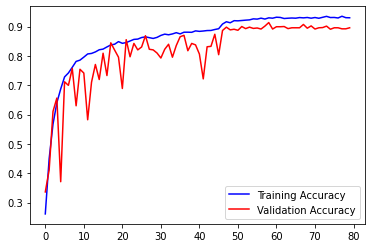

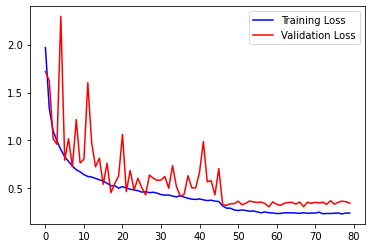

In [ ]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs
 
#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

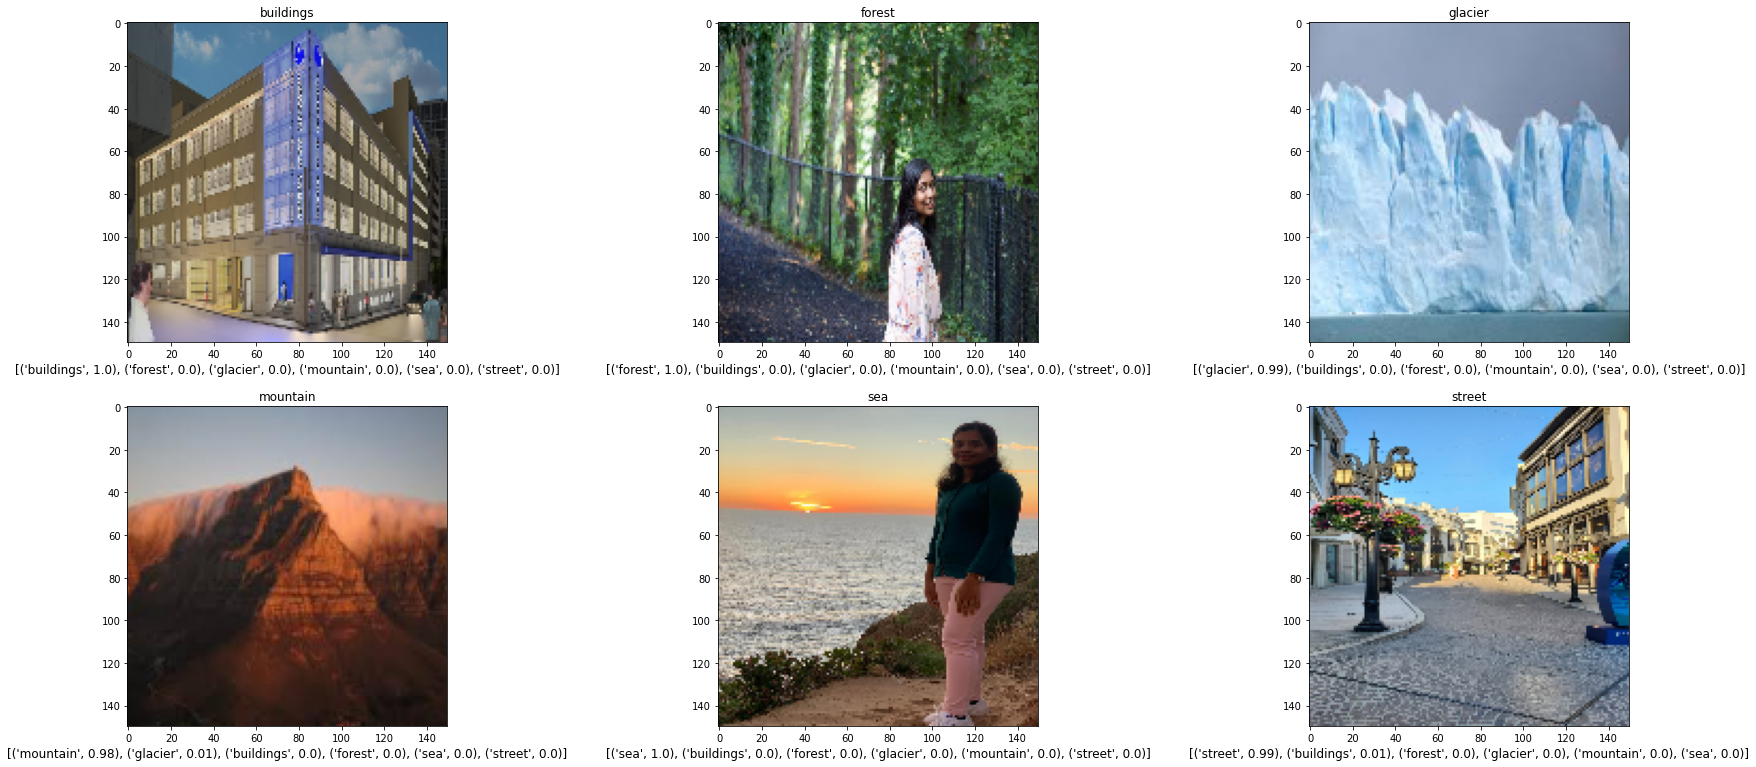

In [ ]:
import numpy as np 
import cv2
import pandas as pd
import tensorflow as tf
from keras.models import Model
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def img_reshape(img):
  img=cv2.resize(img,(150,150))
  plt.imshow(img.reshape([150,150,3]))
  img = np.reshape(img,[1,150,150,3])
  return img


import operator
classes1=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
images=['building_2.jpeg','meg_forest.jpeg','glacier_3.jpg','mountain_2.jpg','Anusha-Sea.jpeg','street_1.jpeg']
nrows=3
ncols=3
j=0

path='/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_pred/seg_pred/'

plt.figure(figsize=[30,20])
for i, img in enumerate(images):
  labels={}
  sp=plt.subplot(nrows,ncols,i+1)
  #sp.axis('Off')
  image=mpimg.imread(path+img)
  plt.imshow(image)
  im_reshape=img_reshape(image)
  a=model1.predict(im_reshape).round(2)
  for j,label in enumerate(classes1):
      labels[classes1[j]]=a[0][j]
  sorted_d = sorted(labels.items(), key=operator.itemgetter(1),reverse=True)
  #print(sorted_d)


  if i%3==0 and i>=3:
    j=j+1
  sp.set_xlabel(sorted_d,fontsize=12)
  sp.title.set_text(classes1[i])
  

  
plt.show()